In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

C:\Users\paleo\AppData\Local\Temp\ipykernel_18056\2945004344.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# 1st assignment

# (a)

In [2]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
print("number of rating rows :", df_ratings.shape[0]) #check for the number of rows
df_movies = pd.read_csv('ml-latest-small/movies.csv')
print("number of movies rows :", df_movies.shape[0]) #check for the number of rows

#creating a table of interest
data=pd.merge(df_movies, df_ratings, on="movieId")
data.drop(['timestamp', 'genres'], axis=1, inplace= True)
data

number of rating rows : 100836
number of movies rows : 9742


,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


### Ratings dataset

In [3]:
#print the first 10 rows
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Movies dataset

In [4]:
#print the first 10 rows
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
# Calcola la matrice utente-oggetto (pivot table)
user_movie_matrix = df_ratings.pivot_table(index='userId', columns='movieId', values='rating')

In [6]:
user_movie_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# (b)

### 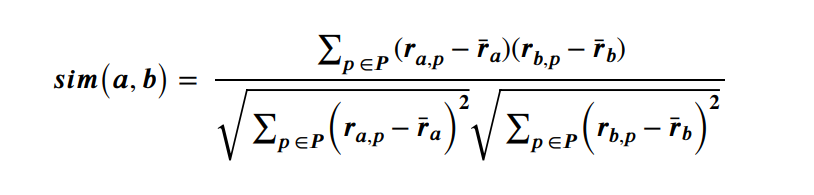

In [7]:
def pearson_correlation(user1_ratings, user2_ratings):
    # Exclude NaN values
    common_movies = user1_ratings.index.intersection(user2_ratings.index)
    if len(common_movies) == 0:
        return 0  # No common movies, return 0 correlation
    else:
        user1_common_ratings = user1_ratings[common_movies]
        user2_common_ratings = user2_ratings[common_movies]
        # Compute mean ratings
        mean_user1 = user1_common_ratings.mean()
        mean_user2 = user2_common_ratings.mean()
        # Compute numerator and denominators
        numerator = ((user1_common_ratings - mean_user1) * (user2_common_ratings - mean_user2)).sum()
        denominator1 = np.sqrt(((user1_common_ratings - mean_user1) ** 2).sum())
        denominator2 = np.sqrt(((user2_common_ratings - mean_user2) ** 2).sum())
        # Handle division by zero
        if denominator1 == 0 or denominator2 == 0:
            return 0
        else:
            return numerator / (denominator1 * denominator2)

In [8]:
# Compute user similarity values (return a dict with user : similarity with target_user_id)
def compute_user_similarity(target_user_id, df_ratings):
    user_ratings = df_ratings.pivot_table(index='movieId', columns='userId', values='rating')
    target_user_ratings = user_ratings[target_user_id]
    user_similarity = {}
    for user in user_ratings.columns:
        if user != target_user_id:
            similarity = pearson_correlation(target_user_ratings, user_ratings[user])
            user_similarity[user] = similarity
    return user_similarity

# (c)

## Prediction function
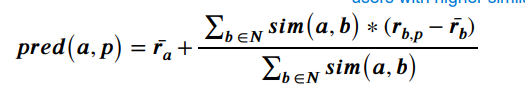

In [9]:
# Prediction function
def predict_rating(target_user_id, movie_id, df_ratings, user_similarity):
    # Filter ratings for the target user
    target_user_ratings = df_ratings[df_ratings['userId'] == target_user_id].set_index('movieId')['rating']
    # Filter ratings for the movie in question
    movie_ratings = df_ratings[df_ratings['movieId'] == movie_id].set_index('userId')
    
    # Filter similar users who have rated the movie
    similar_users = [(user, similarity) for user, similarity in user_similarity.items() if user in movie_ratings.index and similarity > 0]
    if not similar_users:
        return np.nan  # No similar users found
    # Sort similar users by similarity score and take top 10
    sorted_similar_users = sorted(similar_users, key=lambda x: x[1], reverse=True)[:10]
    
    # Calculate numerator and denominator for predicted rating
    numerator = sum(similarity * (movie_ratings.loc[user, 'rating'] - movie_ratings['rating'].mean()) for user, similarity in sorted_similar_users)
    denominator = sum(abs(similarity) for user, similarity in sorted_similar_users)
    if denominator == 0:
        return np.nan  # No similar users found
    
    # Calculate predicted rating
    target_user_mean_rating = target_user_ratings.mean()
    predicted_rating = target_user_mean_rating + (numerator / denominator)
    return predicted_rating


In [10]:

# Example usage (predicting rating for a movie not rated from user 1):
target_user_id = 1
movie_id = 2
user_similarity = compute_user_similarity(target_user_id, df_ratings)
predicted_rating = predict_rating(target_user_id, movie_id, df_ratings, user_similarity)
print("Predicted rating for user", target_user_id, "on movie", movie_id, ":", predicted_rating)

Predicted rating for user 1 on movie 2 : 4.089186824118774


# (d)

#### Select a user from the dataset, and for this user, show the 10 most similar users and the 10 most relevant movies that the recommender suggests

In [11]:
from joblib import Parallel, delayed
# Recommendation function
def recommend_movies(target_user_id, df_ratings, user_similarity):
    # Get movies not rated by target user
    target_user_rated_movies = df_ratings[df_ratings['userId'] == target_user_id]['movieId']    #take the rated movies for the target user
    all_movies = set(df_ratings['movieId'].unique())
    movies_to_recommend = all_movies - set(target_user_rated_movies)    #movies not yet watched     
    
    # Function to predict rating for a movie
    def predict_movie_rating(movie_id):
        return predict_rating(target_user_id, movie_id, df_ratings, user_similarity)
    
    # Parallelize the creation of predicted_ratings dictionary
    predicted_ratings = Parallel(n_jobs=-1)(
        delayed(predict_movie_rating)(movie_id) for movie_id in movies_to_recommend
    )
    
    # Combine movie IDs with predicted ratings
    predicted_ratings = {
        movie_id: rating
        for movie_id, rating in zip(movies_to_recommend, predicted_ratings)
        if not np.isnan(rating)
    }
    
    # Select ordered recommended movies
    top_movies = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
    return top_movies

In [12]:
# Example usage (predicting top 10 movies recommended and top 10 most simalar users for user 1):
target_user_id = 1
user_similarity = compute_user_similarity(target_user_id, df_ratings)
top_similar_users = sorted(user_similarity.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 similar users for user", target_user_id, ":", top_similar_users)

print("\nSearching for the recommended movies...")
recommended_movies = recommend_movies(target_user_id, df_ratings, user_similarity)
print("\nTop 10 recommended movies for user", target_user_id, ":")
for movie_id, rating in recommended_movies[:10]:
    movie_title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
    print(movie_title, "(Predicted Rating:", round(rating, 2), ")")

Top 10 similar users for user 1 : [(301, 0.12479906517911302), (597, 0.10263065929063651), (414, 0.10134803449460647), (477, 0.09921664240127363), (57, 0.09907007791369302), (369, 0.09829454350405929), (206, 0.09685159012412195), (535, 0.09649292687545016), (590, 0.09519062577565124), (418, 0.0941526193713487)]

Searching for the recommended movies...

Top 10 recommended movies for user 1 :
Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962) (Predicted Rating: 6.51 )
Lassie (1994) (Predicted Rating: 6.37 )
Kwaidan (Kaidan) (1964) (Predicted Rating: 6.37 )
Hush (2016) (Predicted Rating: 6.15 )
Tenebre (1982) (Predicted Rating: 6.12 )
Babylon 5 (Predicted Rating: 6.12 )
The Cloverfield Paradox (2018) (Predicted Rating: 6.11 )
Firewalker (1986) (Predicted Rating: 6.03 )
I, Frankenstein (2014) (Predicted Rating: 6.0 )
Losing Isaiah (1995) (Predicted Rating: 5.87 )


# (e)

### Version of the code above using cosine similarity instead of pearson similarity
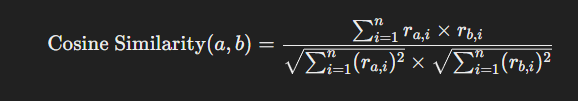
#### Overall, cosine similarity offers a flexible and effective method for measuring the similarity between users based on their preferences, making it a valuable tool in collaborative filtering-based recommendation systems

In [13]:
def cosine_similarity(user1_ratings, user2_ratings):
    #scalar product, sum each product for each element couples of the two vectors
    dot_product = (user1_ratings * user2_ratings).sum()
    magnitude_user1 = (user1_ratings ** 2).sum() ** 0.5
    magnitude_user2 = (user2_ratings ** 2).sum() ** 0.5
    similarity = dot_product / (magnitude_user1 * magnitude_user2)
    return similarity if not pd.isnull(similarity) else 0

def compute_user_similarity_cosine(target_user_id, df_ratings):
    user_ratings = df_ratings.pivot_table(index='movieId', columns='userId', values='rating')
    target_user_ratings = user_ratings[target_user_id]
    user_similarity = {}
    for user in user_ratings.columns:
        if user != target_user_id:
            similarity = cosine_similarity(target_user_ratings, user_ratings[user])
            user_similarity[user] = similarity
    return user_similarity

# Example usage (predicting top 10 movies recommended and top 10 most simalar users for user 1):
target_user_id = 1
user_similarity = compute_user_similarity_cosine(target_user_id, df_ratings)

top_similar_users = sorted(user_similarity.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 similar users for user", target_user_id, ":", top_similar_users)
recommended_movies = recommend_movies(target_user_id, df_ratings, user_similarity)
print("\nSearching for the recommended movies...")

print("\nTop 10 recommended movies for user", target_user_id, ":")
for movie_id, rating in recommended_movies[:10]:
    movie_title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
    print(movie_title, "(Predicted Rating:", round(rating, 2), ")")

Top 10 similar users for user 1 : [(266, 0.3574077096032742), (313, 0.3515615184909569), (368, 0.34512705158353046), (57, 0.3450342788075837), (91, 0.33472692041817076), (469, 0.330664315065201), (39, 0.32978223365752674), (288, 0.3296995292829289), (452, 0.3280483444245288), (45, 0.3279216897772204)]

Searching for the recommended movies...

Top 10 recommended movies for user 1 :
Paper Heart (2009) (Predicted Rating: 6.1 )
Bent (1997) (Predicted Rating: 5.65 )
Under the Skin (2013) (Predicted Rating: 5.57 )
The Cloverfield Paradox (2018) (Predicted Rating: 5.38 )
Kind Hearts and Coronets (1949) (Predicted Rating: 5.29 )
The Great Train Robbery (1903) (Predicted Rating: 5.28 )
Beautiful (2000) (Predicted Rating: 5.26 )
Good Burger (1997) (Predicted Rating: 5.25 )
Stay (2005) (Predicted Rating: 5.25 )
Pickpocket (1959) (Predicted Rating: 5.2 )


# 2nd Assignment

## (a)

In [14]:
#average aggragation
def avg_aggregation(users, df_ratings, df_movies):
    movie_ratings = {}
    avg_movies={}
    # Iterate over each user
    for user in users:
        user_similarity = compute_user_similarity(user, df_ratings)
        recommended_movies = recommend_movies(user, df_ratings, user_similarity)
        
        # Aggregate ratings for recommended movies
        for movie_id, rating in recommended_movies:
            if movie_id not in movie_ratings:
                movie_ratings[movie_id] = []
            movie_ratings[movie_id].append(rating)

    # Compute average ratings for movies that all users have a prediction for
    avg_movies = {movie_id: sum(ratings) / len(ratings) for movie_id, ratings in movie_ratings.items() if len(ratings) == len(users)}
    # Sort movies by average rating
    avg_movies_oredered = dict(sorted(avg_movies.items(), key=lambda item: item[1], reverse=True))
    topTen = dict(list(avg_movies_oredered.items())[:10])
    # Print only the top 10 movies
    # print("Top 10 Movies:")
    # for movie_id, avg_rating in list(avg_movies_oredered.items())[:10]:
    #     title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
    #     print(f"{title}: {avg_rating}")
    return avg_movies_oredered



#least misery method
def min_aggregation(users, df_ratings, df_movies):
    movie_ratings= {}
    min_rating_movies={}
    # Iterate over each user
    for user in users:
        user_similarity =  compute_user_similarity(user, df_ratings)
        recommended_movies = recommend_movies(user, df_ratings, user_similarity)

        # Aggregate ratings for recommended movies
        for movie_id, rating in recommended_movies:
            movie_ratings.setdefault(movie_id, []).append(rating)

    # Compute minimum ratings for movies that all users have a prediction for
    min_rating_movies = {movie_id: np.min(ratings) for movie_id, ratings in movie_ratings.items() if len(ratings) == len(users)}

    # Sort movies by minimum rating
    min_rating_movies_oredered = dict(sorted(min_rating_movies.items(), key=lambda item: item[1], reverse=True))
    topTen = dict(list(min_rating_movies_oredered.items())[:10])
    # Print only the top 10 movies
    # print("Top 10 Movies:")
    # for movie_id, min_rating in list(min_rating_movies_oredered.items())[:10]:
    #     title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
    #     print(f"{title}: {min_rating}")
    return min_rating_movies_oredered


users = [1, 6, 608]

# # Call the function average
# print("\nResult with average aggregation: \n")
# avg_aggregation(users, df_ratings, df_movies)

# # Call the function least misery
# print("\nResult with least misery aggregation: \n")
# min_aggregation(users, df_ratings, df_movies)


## (b)

In [15]:
import statistics

def dev_aggregation(users, df_ratings, df_movies):
    movie_ratings= {}
    dev_avg_movies = {}
    # Iterate over each user
    for user in users:
        user_similarity = compute_user_similarity(user, df_ratings)
        recommended_movies = recommend_movies(user, df_ratings, user_similarity)
        # Aggregate ratings for recommended movies
        for movie_id, rating in recommended_movies:
            if movie_id not in movie_ratings:
                movie_ratings[movie_id] = []
            movie_ratings[movie_id].append(rating)

    for movie_id, ratings in movie_ratings.items():
        #use only the movies all users have a prediction for
        if len(ratings) == len(users):
            #Compute standard deviation
            dev = statistics.stdev(ratings)
            #Compute average
            avg=sum(ratings) / len(ratings)
            dev_avg_movies[movie_id] = (dev,avg)
    
    #Sort movie by their average and their deviation
    dev_avg_movies_ordered = dict(sorted(dev_avg_movies.items(), key=lambda x: (x[1][1] * (-x[1][0])), reverse=True))

    # Print only the top 10 movies
    # print("Top 10 Movies:")
    result = []
    # for movie_id, val_rating in dev_avg_movies_ordered.items()[:10]:
    #     title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
    #     result.append(val_rating)
    # #     print(f"{title}: Wheight={val_rating[0]}, Average={val_rating[1]}")
    return dev_avg_movies_ordered

users = [1, 6, 608]

# Call the function
# dev_aggregation(users, df_ratings, df_movies)

# 3rd Assignment

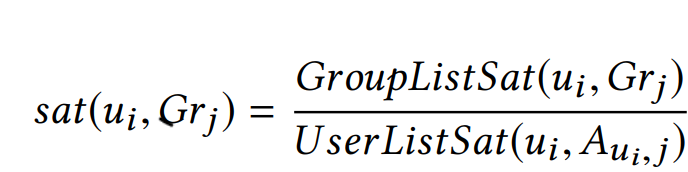

In [16]:
#function to calculate satisfaction of a user
def user_satisfaction(user, group_recommendations_ratings) :
    numerator = sum(group_recommendations_ratings.values())
    denominator = 0
    user_similarity = compute_user_similarity(user, df_ratings)
    user_recommendations = recommend_movies(user, df_ratings, user_similarity)

    for movie_id, _ in group_recommendations_ratings.items():
        if movie_id in [movie[0] for movie in user_recommendations]:
            # Find the rating for the movie in user_recommendations
            rating = next(item[1] for item in user_recommendations if item[0] == movie_id)
            denominator += rating

            
    return numerator/denominator

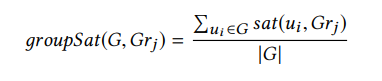

In [17]:
#user_list : list of users in the group
def group_satisfaction(user_list, group_recommendations_ratings):
    numerator = 0
    for u in user_list:
        numerator += user_satisfaction(u, group_recommendations_ratings)
    return numerator/len(user_list)

In [18]:
def sequential_aggregation_pass(users, df_ratings, df_movies, alfa, prev_recommendations):
    movie_rating_avg= avg_aggregation(users, df_ratings, df_movies)
    if alfa > 0 :
        movie_rating_least= min_aggregation(users, df_ratings, df_movies)
    movie_rating_sequential = {}
    if alfa > 0 :
        for movie, rating in movie_rating_avg.items() :
            if movie in movie_rating_least:
                movie_rating_sequential[movie] = (1-alfa)*rating + alfa*movie_rating_least[movie]
    else:
        movie_rating_sequential = movie_rating_avg

    # Exclude movies already recommended in previous iterations
    for movie in prev_recommendations:
        if movie in movie_rating_sequential:
            del movie_rating_sequential[movie]


    return dict(sorted(movie_rating_sequential.items(), key=lambda item: item[1], reverse=True))


In [19]:
def sequential_aggregation(user_list, df_ratings, df_movies, n_iterations) :
    seq_aggregation = {}
    satOxuser = {} #dictionary to store the overall satisfaction of each user
    alfa = 0
    users_satisfaction_cache = {}  # Cache for user satisfaction values
    prev_recommendations = set()  # Set to store previous recommendations

    for j in range(n_iterations) :       
        if j > 0 :
            sat_list = []
            for u in user_list:
                sat_list.append(users_satisfaction_cache[u])
            alfa = max(sat_list) - min(sat_list)
            users_satisfaction_cache.clear()
        seq_aggregation = sequential_aggregation_pass(user_list, df_ratings, df_movies, alfa, prev_recommendations)
        print("\nSequence #", j)
        for movie_id, rating in list(seq_aggregation.items())[:10]:
            title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
            print(f"{title}: {rating}")

         # Update previous recommendations
        prev_recommendations.update(list(seq_aggregation.keys())[:10])
        # print("group statisfaction: ", group_satisfaction(user_list, seq_aggregation))
        #update of the overall satisfaction of each user (satOxuser)
        for u in user_list :
            users_satisfaction_cache[u] = user_satisfaction(u, seq_aggregation)
            if satOxuser.get(u) != None:
                satOxuser[u] = (satOxuser[u]*j + users_satisfaction_cache[u])/(j+1)
            else :
                satOxuser[u] = users_satisfaction_cache[u]/(j+1)
        print(users_satisfaction_cache)
        print("\nGroup Overall Satisfaction:", sum(satOxuser.values())/len(user_list))
        print("Group Disagreement:", max(satOxuser.values()) - min(satOxuser.values()))
   
        

    return seq_aggregation


In [20]:
# #Example of usage
seq_agg = sequential_aggregation([1, 6, 608], df_ratings, df_movies, 3)


Sequence # 0
Exorcist III, The (1990): 5.209116976629596
Class, The (Klass) (2007): 5.03582369391201
To Be or Not to Be (1942): 4.952241040621208
War for the Planet of the Apes (2017): 4.9008413080371405
Under the Skin (2013): 4.9003370834105375
The Cloverfield Paradox (2018): 4.863372980860582
Death Note (2017): 4.82463889918967
Scratch (2001): 4.792207573957112
Skin I Live In, The (La piel que habito) (2011): 4.767261842983243
Room in Rome (Habitación en Roma) (2010): 4.734268858680166
{1: 0.8387144023003736, 6: 1.0405846758630972, 608: 1.1810547132006883}

Group Overall Satisfaction: 1.0201179304547197
Group Disagreement: 0.3423403109003147

Sequence # 1
Butterfly (La lengua de las mariposas) (1999): 4.461250069509465
American Me (1992): 4.43875262782038
Puppet Master (1989): 4.427810663827206
Young People Fucking (a.k.a. YPF) (2007): 4.413208147861318
Waydowntown (2000): 4.406117134203379
Love's Labour's Lost (2000): 4.398767455498795
Two Moon Junction (1988): 4.344349700804701
Th

## modified method

In [21]:
def sequential_aggregation_pass(users, df_ratings, df_movies, alfa, prev_recommendations):
    movie_rating_avg_dirty= dev_aggregation(users, df_ratings, df_movies)
    # Creazione del nuovo dizionario con le chiavi invariate e come valori la moltiplicazione tra la deviazione standard e la media
    movie_rating_avg = {key: (value[1]/value[0]) for key, value in movie_rating_avg_dirty.items()}
    if alfa > 0 :
        movie_rating_least= min_aggregation(users, df_ratings, df_movies)
    movie_rating_sequential = {}
    if alfa > 0 :
        for movie, rating in movie_rating_avg.items() :
            if movie in movie_rating_least:
                movie_rating_sequential[movie] = (1-alfa)*rating + alfa*movie_rating_least[movie]
    else:
        movie_rating_sequential = movie_rating_avg

    # Exclude movies already recommended in previous iterations
    for movie in prev_recommendations:
        if movie in movie_rating_sequential:
            del movie_rating_sequential[movie]


    return dict(sorted(movie_rating_sequential.items(), key=lambda item: item[1], reverse=True))

def sequential_aggregation(user_list, df_ratings, df_movies, n_iterations) :
    seq_aggregation = {}
    satOxuser = {} #dictionary to store the overall satisfaction of each user
    alfa = 0
    users_satisfaction_cache = {}  # Cache for user satisfaction values
    prev_recommendations = set()  # Set to store previous recommendations

    for j in range(n_iterations) :       
        if j > 0 :
            sat_list = []
            for u in user_list:
                sat_list.append(users_satisfaction_cache[u])
            alfa = statistics.stdev(sat_list)
            users_satisfaction_cache.clear()
        seq_aggregation = sequential_aggregation_pass(user_list, df_ratings, df_movies, alfa, prev_recommendations)
        print("\nSequence #", j)
        for movie_id, rating in list(seq_aggregation.items())[:10]:
            title = df_movies[df_movies['movieId'] == movie_id]['title'].values[0]
            print(f"{title}: {rating}")

         # Update previous recommendations
        prev_recommendations.update(list(seq_aggregation.keys())[:10])
        # print("group statisfaction: ", group_satisfaction(user_list, seq_aggregation))
        #update of the overall satisfaction of each user (satOxuser)
        for u in user_list :
            users_satisfaction_cache[u] = user_satisfaction(u, seq_aggregation)
            if satOxuser.get(u) != None:
                satOxuser[u] = (satOxuser[u]*j + users_satisfaction_cache[u] )/(j+1)
            else :
                satOxuser[u] = users_satisfaction_cache[u]/(j+1)
        print(users_satisfaction_cache)
        print("\nGroup Overall Satisfaction:", sum(satOxuser.values())/len(user_list))
        print("Group Disagreement:", max(satOxuser.values()) - min(satOxuser.values()))
         

    return seq_aggregation

In [22]:
#Example of usage
seq_agg = sequential_aggregation([1, 6, 608], df_ratings, df_movies, 3)


Sequence # 0
Last Knights (2015): 63.26436326694515
House II: The Second Story (1987): 32.367304021593235
Search Party (2014): 31.62287018873014
Victor Frankenstein (2015): 31.62287018873014
Star Wars: Episode III - Revenge of the Sith (2005): 25.950773544281695
Eight Crazy Nights (Adam Sandler's Eight Crazy Nights) (2002): 20.6298855523163
Lockout (2012): 20.357513350668157
Left Behind: The Movie (2000): 19.94743247960681
Swiss Army Man (2016): 17.900480597572493
I Sell the Dead (2008): 16.896482463203434
{1: 1.2925978369400661, 6: 1.6037133707069848, 608: 1.8202009687731042}

Group Overall Satisfaction: 1.572170725473385
Group Disagreement: 0.5276031318330381

Sequence # 1
Zombeavers (2014): 13.280326041895952
Killers (2010): 13.227337068369694
Furious 7 (2015): 12.294613838399474
Azumi (2003): 12.191758012944089
Stranger in the House (1997): 12.070901418543027
Altered States (1980): 11.941487928996466
Waydowntown (2000): 11.612974277828954
War for the Planet of the Apes (2017): 11.